In [340]:
from google.colab import drive
drive.mount('/content/drive')
DRIVE_PATH = 'drive/MyDrive/Colab Notebooks/Intro_to_ML/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data

In [341]:
import pandas as pd

In [505]:
data = pd.read_csv(DRIVE_PATH+'medical_cost_data.csv')

In [507]:
data.head()

,Unnamed: 0,age,sex,height,weight,bmi,caloric_intake,mean_heart_rate,glucose_levels,children,work_hours,income,region,charges
0,0,19,female,189,99.661590,27.900,2788,89.185611,4.508627,0,9.472349,1006.255278,southwest,16884.92400
1,1,18,male,197,131.057993,33.770,2893,62.081449,4.490951,1,7.933420,1000.063069,southeast,1725.55230
2,2,28,male,184,111.724800,33.000,2008,85.128197,4.124635,3,8.327503,1002.599742,southeast,4449.46200
3,3,33,male,194,85.452538,22.705,2708,50.142537,5.241815,0,16.514809,1001.152425,northwest,21984.47061
4,4,32,male,173,86.434952,28.880,2092,88.009636,5.018429,0,7.642277,1000.432587,northwest,3866.85520


In [508]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [509]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='age', ylabel='Count'>

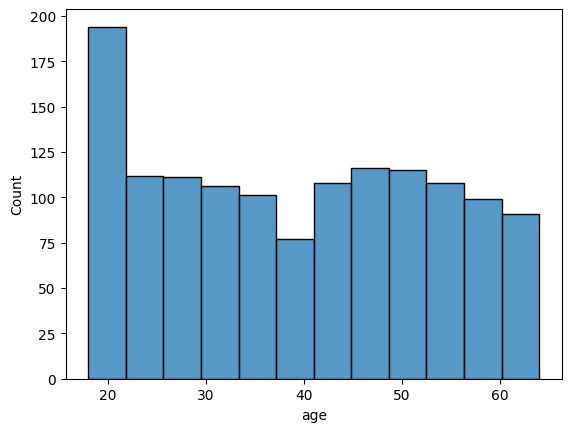

In [510]:
sns.histplot(data['age'])

<Axes: xlabel='bmi', ylabel='Count'>

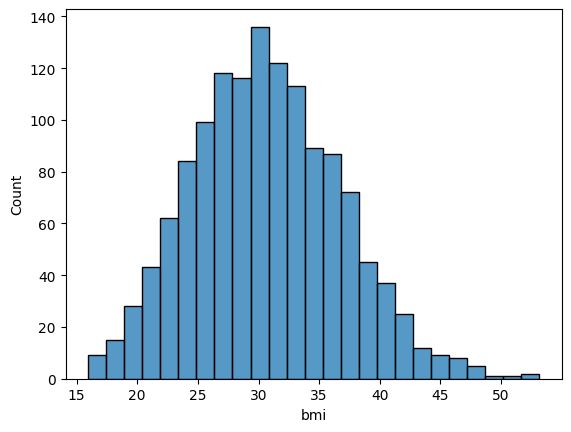

In [511]:
sns.histplot(data['bmi'])

<Axes: xlabel='charges', ylabel='Count'>

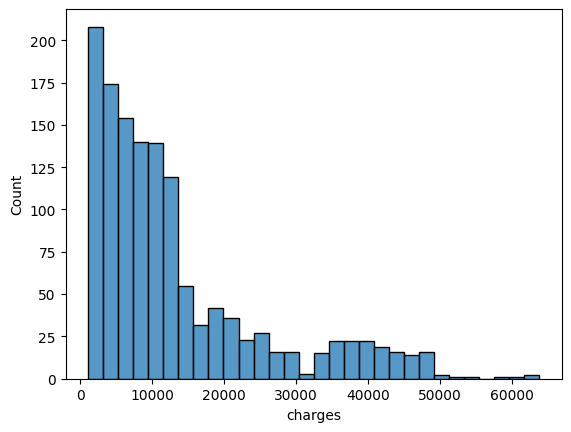

In [512]:
sns.histplot(data['charges'])

In [513]:
# See more EDA here: https://www.kaggle.com/code/hely333/eda-regression

# Enter *scikit-learn*

In [531]:
y_colname = 'charges'
y = data[y_colname]
X = data.drop([y_colname], axis=1)

In [532]:
# TRAIN-EVAL-TEST
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [533]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cols_to_transform = ['sex', 'region']
# FIT-TRANSFORM-PREDICT LOGIC
ohe.fit(X_train[cols_to_transform])

OneHotEncoder()

In [534]:
# Use the OneHotEncoder to create a new matrix
X_gen_trans = ohe.transform(X_train[cols_to_transform]).toarray()
X_gen_trans = X_gen_trans.T

# Add the matrix rows as columns to the X_train DataFrame
new_col_names = ohe.get_feature_names_out()
for i, col in enumerate(new_col_names):
  X_train[col] = X_gen_trans[i]

# Remove the unnecessary column and adjust the data types
# It is important to keep your dataset lean (computational cost can explode quickly when scaling)
X_train = X_train.drop(cols_to_transform, axis=1)
X_train.loc[:, new_col_names] = X_train.loc[:, new_col_names].astype('int')
X_train

<ipython-input-534-a7577b1907a2>:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_train.loc[:, new_col_names] = X_train.loc[:, new_col_names].astype('int')


,work_hours,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
1046,8.597041,1,0,1,0,0,0
682,11.812970,0,1,0,0,0,1
1037,21.431029,1,0,0,1,0,0
490,7.427535,1,0,0,0,0,1
39,13.272866,0,1,0,0,0,1
...,...,...,...,...,...,...,...
1095,8.488266,1,0,1,0,0,0
1130,9.055854,1,0,0,0,1,0
1294,10.578797,0,1,1,0,0,0
860,16.567698,1,0,0,0,0,1


In [535]:
# Put it into a function -> DRY (don't repeat yourself)
def ohe_transform_cat_feats(ohe, X):
  cols_to_transform = ['sex', 'region']
  # Use the OneHotEncoder to create a new matrix
  X_gen_trans = ohe.transform(X[cols_to_transform]).toarray()
  X_gen_trans = X_gen_trans.T

  # Add the matrix rows as columns to the X DataFrame
  new_col_names = ohe.get_feature_names_out()
  for i, col in enumerate(new_col_names):
    X[col] = X_gen_trans[i]

  # Remove the unnecessary column and adjust the data types
  # It is important to keep your dataset lean (computational cost can explode quickly when scaling)
  X = X.drop(cols_to_transform, axis=1)
  X.loc[:, new_col_names] = X.loc[:, new_col_names].astype('int')
  return X

In [536]:
# Now do the same for the X_test
# Why is it important to do them separately?
X_test = ohe_transform_cat_feats(ohe, X_test)
X_test

<ipython-input-535-62a796162a9d>:16: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, new_col_names] = X.loc[:, new_col_names].astype('int')


,work_hours,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
764,8.473943,1,0,1,0,0,0
887,8.642828,1,0,0,1,0,0
890,10.276023,1,0,0,1,0,0
1293,8.742813,0,1,0,1,0,0
259,9.766670,0,1,0,1,0,0
...,...,...,...,...,...,...,...
644,6.660268,0,1,0,0,1,0
602,8.462220,1,0,0,0,0,1
731,9.615741,0,1,0,0,0,1
321,8.954053,1,0,1,0,0,0


# Train the ML model

In [537]:
from sklearn.linear_model import Ridge

In [538]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [539]:
y_pred = ridge.predict(X_test)

# Score the model

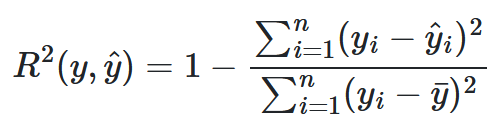

In [540]:
from IPython.display import Image
Image(DRIVE_PATH+'R2_score_sklearn.png') # Reference: https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score (retrieved 2023-05-21)

In [541]:
from sklearn.metrics import r2_score, mean_squared_error # https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
# User guide: https://scikit-learn.org/stable/modules/model_evaluation.html
score = r2_score(y_test, y_pred)
score

0.6057793209787301

In [542]:
# Not as easy to interpret as the r2_score
mean_squared_error(y_test, y_pred)

57770933.76045784

# Assignment: What if we train it without train-test-split?

In [543]:
# First, fit the OneHotEncoder on the full dataset
ohe_full = OneHotEncoder()
cols_to_transform = ['sex', 'region']
ohe_full.fit(X[cols_to_transform])
X_temp = ohe_transform_cat_feats(ohe_full, X) # Assignment: one-hot-encode categorical features

# Now, train Ridge on the full dataset
ridge_full = Ridge(alpha=1.0)
ridge_full.fit(X_temp, y)

y_pred = ridge_full.predict(X_test)

score_full = r2_score(y_test, y_pred)
score_full

<ipython-input-535-62a796162a9d>:16: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, new_col_names] = X.loc[:, new_col_names].astype('int')


0.6131046253622368

# Assignment: Use the GradientBoostingRegressor instead of Ridge

This time (and from now on always), use the train-test-split again, it is the best practice!

In [544]:
from sklearn.ensemble import GradientBoostingRegressor # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

score = r2_score(y_test, y_pred)
score

0.6654518072012297

In [545]:
# GradientBoostingRegressor also uses the r2_score under the hood
gbr.score(X_test, y_test)

0.6654518072012297

In [ ]:
mean_squared_error(y_test, y_pred)

21982588.80369516

# Hyperparameter tuning

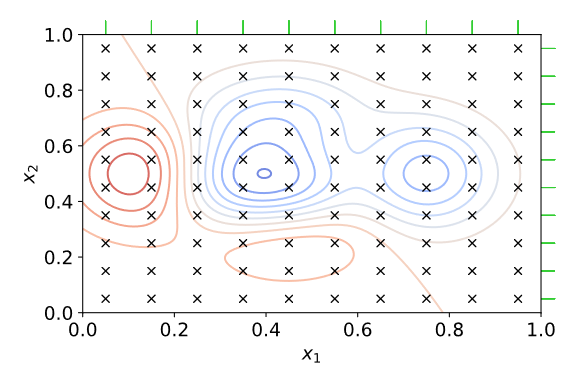

In [ ]:
Image(DRIVE_PATH+'grid_search.png') # Reference: https://en.wikipedia.org/wiki/Hyperparameter_optimization (retrieved 2023-05-21)

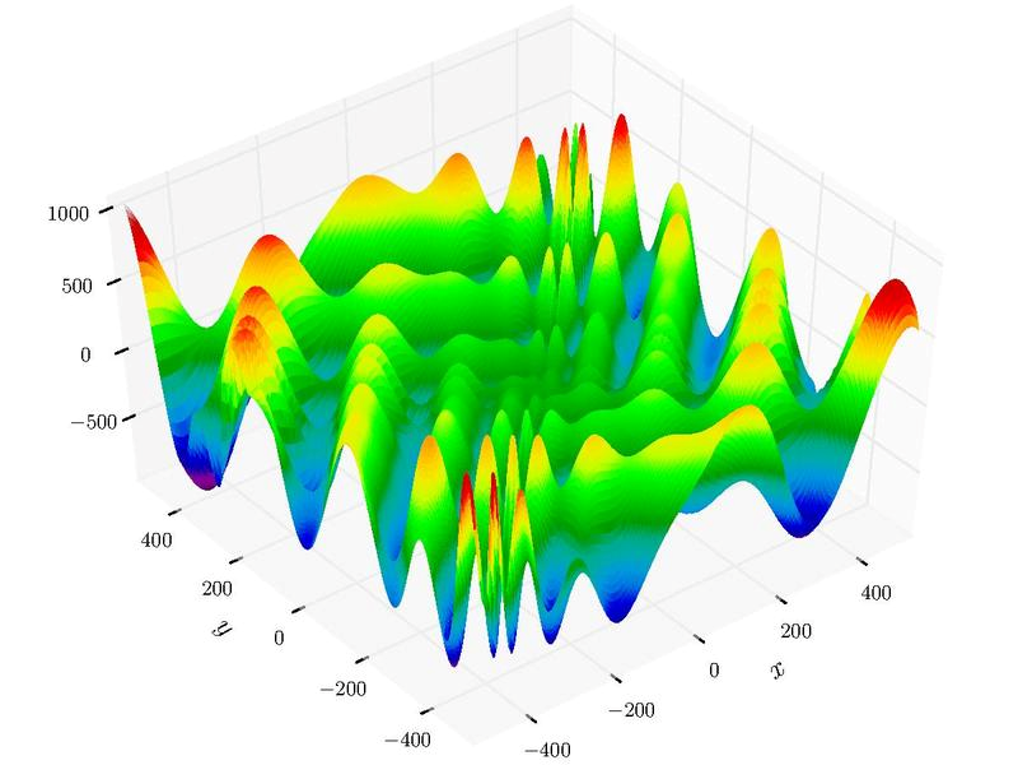

In [ ]:
Image(DRIVE_PATH+'complicated_function.png') # Source: https://en.wikipedia.org/wiki/Test_functions_for_optimization (retrieved 2021-05-03)

In [ ]:
from sklearn.model_selection import GridSearchCV # Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV (retrieved 2023-05-21)

In [ ]:
gbr = GradientBoostingRegressor()

# Define the parameters to try out = 'the search space'
parameters = {'learning_rate': [0.01, 0.1], 'criterion': ('friedman_mse','squared_error')}

# Use the GridSearch algorithm almost in the same way as an ML model
gscv = GridSearchCV(gbr, parameters, verbose=1)
gscv.fit(X_train, y_train)

y_pred = gscv.predict(X_test)

score = r2_score(y_test, y_pred)
score

Fitting 5 folds for each of 4 candidates, totalling 20 fits


0.850684235508214

In [ ]:
gscv.cv_results_

{'mean_fit_time': array([0.25970988, 0.24474072, 0.24926882, 0.24203949]),
 'std_fit_time': array([0.01150294, 0.00712386, 0.00490877, 0.0021168 ]),
 'mean_score_time': array([0.00298696, 0.0025703 , 0.00270534, 0.00262923]),
 'std_score_time': array([4.65529145e-04, 4.30001904e-05, 1.88839315e-04, 7.82414659e-05]),
 'param_criterion': masked_array(data=['friedman_mse', 'friedman_mse', 'squared_error',
                    'squared_error'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.01, 0.1, 0.01, 0.1],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'friedman_mse', 'learning_rate': 0.01},
  {'criterion': 'friedman_mse', 'learning_rate': 0.1},
  {'criterion': 'squared_error', 'learning_rate': 0.01},
  {'criterion': 'squared_error', 'learning_rate': 0.1}],
 'split0_test_score': array([0.78144684, 0.89245443, 

In [ ]:
gs_res = gscv.best_params_
gs_res

{'criterion': 'squared_error', 'learning_rate': 0.1}

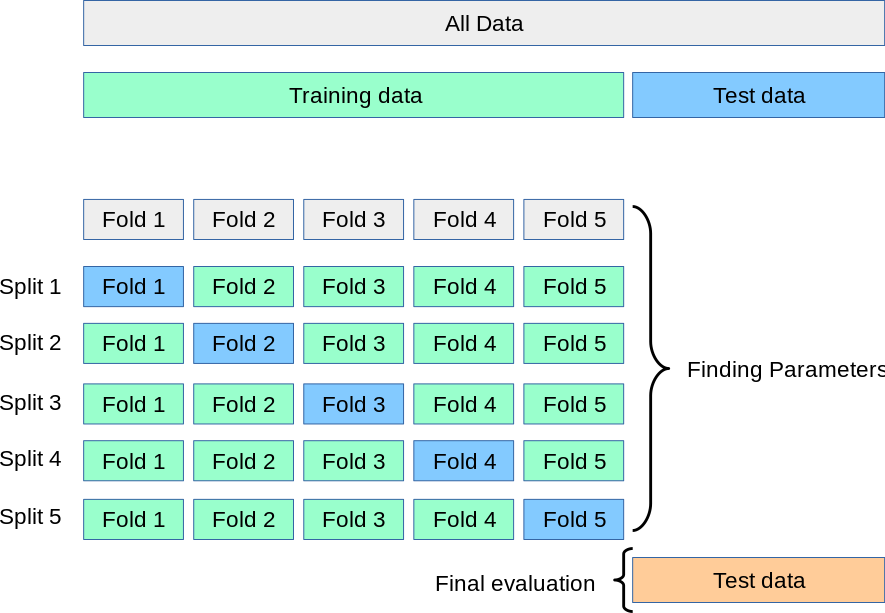

In [ ]:
# Cross-validation intuition
Image(DRIVE_PATH+'grid_search_cross_validation.png') # Reference: https://scikit-learn.org/stable/modules/cross_validation.html (retrieved 2023-05-21)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV # Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV (retrieved 2023-05-21)

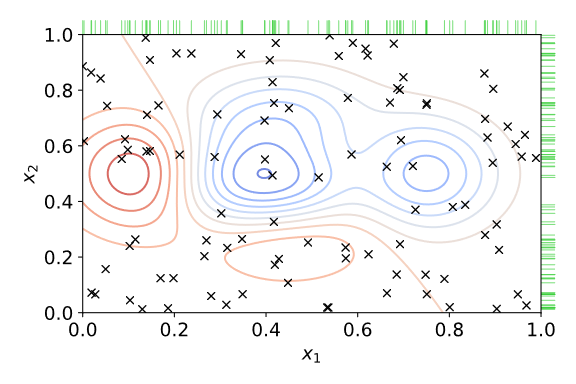

In [ ]:
Image(DRIVE_PATH+'randomized_search.png') # Reference: https://en.wikipedia.org/wiki/Hyperparameter_optimization (retrieved 2023-05-21)

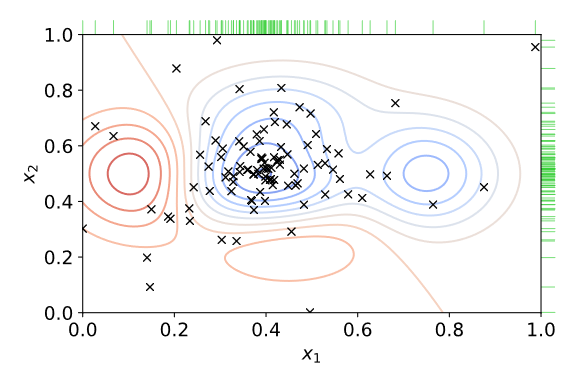

In [ ]:
Image(DRIVE_PATH+'optimized_search.png') # Reference: https://en.wikipedia.org/wiki/Hyperparameter_optimization (retrieved 2023-05-21)

(array([30., 15., 19., 13., 10.,  5.,  6.,  2.]),
 array([1.00000000e-04, 3.61779178e-02, 7.22558356e-02, 1.08333753e-01,
        1.44411671e-01, 1.80489589e-01, 2.16567507e-01, 2.52645425e-01,
        2.88723342e-01]),
 <BarContainer object of 8 artists>)

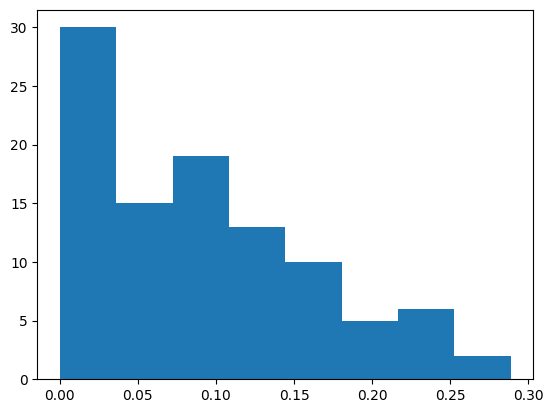

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Use previous best results as a starting point
mu = gs_res['learning_rate']
sigma = gs_res['learning_rate']

# Set array size and bounds for the clipping (remember: learning rate must be strictly positive!)
size = 100  # Number of samples
lower_bound = mu/1000  # Lower bound for clipping
upper_bound = np.inf  # No upper bound

# Generate random numbers from the clipped normal distribution
random_numbers = np.random.normal(loc=mu, scale=sigma, size=size)
random_numbers = np.clip(random_numbers, lower_bound, upper_bound)
plt.hist(random_numbers, bins='auto')

In [ ]:
# Parameters can now include a lot of values but not all of them will be used!
parameters = {'learning_rate': random_numbers,
              'n_estimators': [5, 10, 50, 100],
              'criterion': ('friedman_mse','squared_error'),
              'loss': ('squared_error', 'absolute_error', 'huber', 'quantile')}

gbr = GradientBoostingRegressor()

# Define n_iter, too!
rscv = RandomizedSearchCV(gbr, parameters, verbose=2, random_state=42, n_iter=50,
                          refit=True)
rscv.fit(X_train, y_train)

y_pred = rscv.predict(X_test)

score = r2_score(y_test, y_pred)
score

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END criterion=squared_error, learning_rate=0.0001, loss=squared_error, n_estimators=5; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.0001, loss=squared_error, n_estimators=5; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.0001, loss=squared_error, n_estimators=5; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.0001, loss=squared_error, n_estimators=5; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.0001, loss=squared_error, n_estimators=5; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.0001, loss=huber, n_estimators=50; total time=   0.1s
[CV] END criterion=squared_error, learning_rate=0.0001, loss=huber, n_estimators=50; total time=   0.1s
[CV] END criterion=squared_error, learning_rate=0.0001, loss=huber, n_estimators=50; total time=   0.2s
[CV] END criterion=squared_error, learning_rate=0.0001, loss=huber, n_e

0.8624681561250375

In [ ]:
rscv_best_params = rscv.best_params_
rscv_best_params

{'n_estimators': 100,
 'loss': 'huber',
 'learning_rate': 0.0545233932162775,
 'criterion': 'squared_error'}

# Assignment

Now, to compare several models and make an honest estimate of the models' behavior, you need another holdout set!

You could retrain on train+test sets and test on the holdout=validation set

In [ ]:
# Run train_test_split once to create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Run train_test_split again on X_test and y_test to create eval and test sets
X_eval, X_test, y_eval, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

# One-hot-encode categorical features for all sets
# Remember to fit only on the train set
ohe_final = OneHotEncoder()
cols_to_transform = ['sex', 'region']
ohe_full.fit(X_train[cols_to_transform])
X_train = ohe_transform_cat_feats(ohe, X_train)
X_eval = ohe_transform_cat_feats(ohe, X_eval)
X_test = ohe_transform_cat_feats(ohe, X_test)



<ipython-input-19-a965d87cf32f>:16: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, new_col_names] = X.loc[:, new_col_names].astype('int')
<ipython-input-19-a965d87cf32f>:16: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, new_col_names] = X.loc[:, new_col_names].astype('int')
<ipython-input-19-a965d87cf32f>:16: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, 

In [ ]:
# Run a RandomizedSearchCV (same as above) on X_train, y_train
    # Run one for the GradientBoostingRegressor
    # Run another on a Regressor of your preference (see https://scikit-learn.org/stable/modules/classes.html for a list of Regressors)
parameters = {'learning_rate': random_numbers,
              'n_estimators': [5, 10, 50, 100],
              'criterion': ('friedman_mse','squared_error'),
              'loss': ('squared_error', 'absolute_error', 'huber', 'quantile')}

gbr = GradientBoostingRegressor()

# Define n_iter, too!
rscv_gbr = RandomizedSearchCV(gbr, parameters, verbose=2, random_state=42, n_iter=50,
                          refit=True)
rscv_gbr.fit(X_train, y_train)

y_pred_gbr = rscv_gbr.predict(X_eval)

score_gbr = r2_score(y_eval, y_pred_gbr)
score_gbr

# Test both models on your X_eval, y_eval and pick the model with the highest score

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END criterion=squared_error, learning_rate=0.0001, loss=squared_error, n_estimators=5; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.0001, loss=squared_error, n_estimators=5; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.0001, loss=squared_error, n_estimators=5; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.0001, loss=squared_error, n_estimators=5; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.0001, loss=squared_error, n_estimators=5; total time=   0.0s
[CV] END criterion=squared_error, learning_rate=0.0001, loss=huber, n_estimators=50; total time=   0.2s
[CV] END criterion=squared_error, learning_rate=0.0001, loss=huber, n_estimators=50; total time=   0.1s
[CV] END criterion=squared_error, learning_rate=0.0001, loss=huber, n_estimators=50; total time=   0.2s
[CV] END criterion=squared_error, learning_rate=0.0001, loss=huber, n_e

0.8691423664619277

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

parameters_adr = {'learning_rate': random_numbers,
              'loss': ('linear', 'square', 'exponential')}

adr = AdaBoostRegressor()

# Define n_iter, too!
rscv_adr = RandomizedSearchCV(adr, parameters_adr, verbose=2, random_state=42, n_iter=50,
                          refit=True)
rscv_adr.fit(X_train, y_train)

y_pred_adr = rscv_adr.predict(X_eval)

score_adr = r2_score(y_eval, y_pred_adr)
score_adr

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END .............learning_rate=0.0001, loss=exponential; total time=   0.1s
[CV] END .............learning_rate=0.0001, loss=exponential; total time=   0.1s
[CV] END .............learning_rate=0.0001, loss=exponential; total time=   0.1s
[CV] END .............learning_rate=0.0001, loss=exponential; total time=   0.1s
[CV] END .............learning_rate=0.0001, loss=exponential; total time=   0.1s
[CV] END learning_rate=0.09622322507630245, loss=exponential; total time=   0.1s
[CV] END learning_rate=0.09622322507630245, loss=exponential; total time=   0.1s
[CV] END learning_rate=0.09622322507630245, loss=exponential; total time=   0.1s
[CV] END learning_rate=0.09622322507630245, loss=exponential; total time=   0.1s
[CV] END learning_rate=0.09622322507630245, loss=exponential; total time=   0.1s
[CV] END learning_rate=0.06300047181954715, loss=exponential; total time=   0.1s
[CV] END learning_rate=0.06300047181954715, los

0.8530766038593097

In [ ]:
# Finally, get the final score of your chosen model using X_test and y_test
y_pred_final = rscv.predict(X_test)

score_final = r2_score(y_test, y_pred_final)
score_final

0.9063984322224883

In [ ]:
# NOW, to make an honest estimate of the model's behavior, you need another holdout set!
# You could retrain on train+test sets and test on the holdout=validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

ohe_final = OneHotEncoder()
cols_to_transform = ['sex', 'region']
ohe_full.fit(X_train[cols_to_transform])
X_train = ohe_transform_cat_feats(ohe, X_train)
X_test = ohe_transform_cat_feats(ohe, X_test)

# Intastiate the model with the best parameters found through the search above
gbr = GradientBoostingRegressor(**rscv_best_params)

gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

score = r2_score(y_test, y_pred)
score

<ipython-input-19-a965d87cf32f>:16: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, new_col_names] = X.loc[:, new_col_names].astype('int')
<ipython-input-19-a965d87cf32f>:16: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, new_col_names] = X.loc[:, new_col_names].astype('int')


0.8742771928859434

# Learning curve

In [ ]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None,
                        train_sizes=np.linspace(.1, 1.0, 5), scoring=make_scorer(r2_score)):
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

        axes[0].set_title(title)
        axes[0].set_xlabel("Training examples")
        axes[0].set_ylabel("Score")

        train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                                                                              train_sizes=train_sizes, return_times=True, scoring=scoring)
        if np.any(np.isnan(train_scores)) or np.any(np.isnan(test_scores)):
            raise AssertionError("Are you trying to use a classification scoring for a regression model or vice versa?"
                                 " Please verify that the estimator and the scoring method are consistent.")

        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        fit_times_mean = np.mean(fit_times, axis=1)
        fit_times_std = np.std(fit_times, axis=1)

        # Plot learning curve
        axes[0].grid()
        axes[0].fill_between(
            train_sizes,
            train_scores_mean - train_scores_std,
            train_scores_mean + train_scores_std,
            alpha=0.1,
            color="r",
        )
        axes[0].fill_between(
            train_sizes,
            test_scores_mean - test_scores_std,
            test_scores_mean + test_scores_std,
            alpha=0.1,
            color="g",
        )
        axes[0].plot(
            train_sizes, train_scores_mean, "o-", color="r", label="Training score"
        )
        axes[0].plot(
            train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
        )
        axes[0].legend(loc="best")

        # Plot n_samples vs fit_times
        axes[1].grid()
        axes[1].plot(train_sizes, fit_times_mean, "o-")
        axes[1].fill_between(
            train_sizes,
            fit_times_mean - fit_times_std,
            fit_times_mean + fit_times_std,
            alpha=0.1,
        )
        axes[1].set_xlabel("Training examples")
        axes[1].set_ylabel("fit_times")
        axes[1].set_title("Scalability of the model")

        # Plot fit_time vs score
        axes[2].grid()
        axes[2].plot(fit_times_mean, test_scores_mean, "o-")
        axes[2].fill_between(
            fit_times_mean,
            test_scores_mean - test_scores_std,
            test_scores_mean + test_scores_std,
            alpha=0.1,
        )
        axes[2].set_xlabel("fit_times")
        axes[2].set_ylabel("Score")
        axes[2].set_title("Performance of the model")

        plt.show()

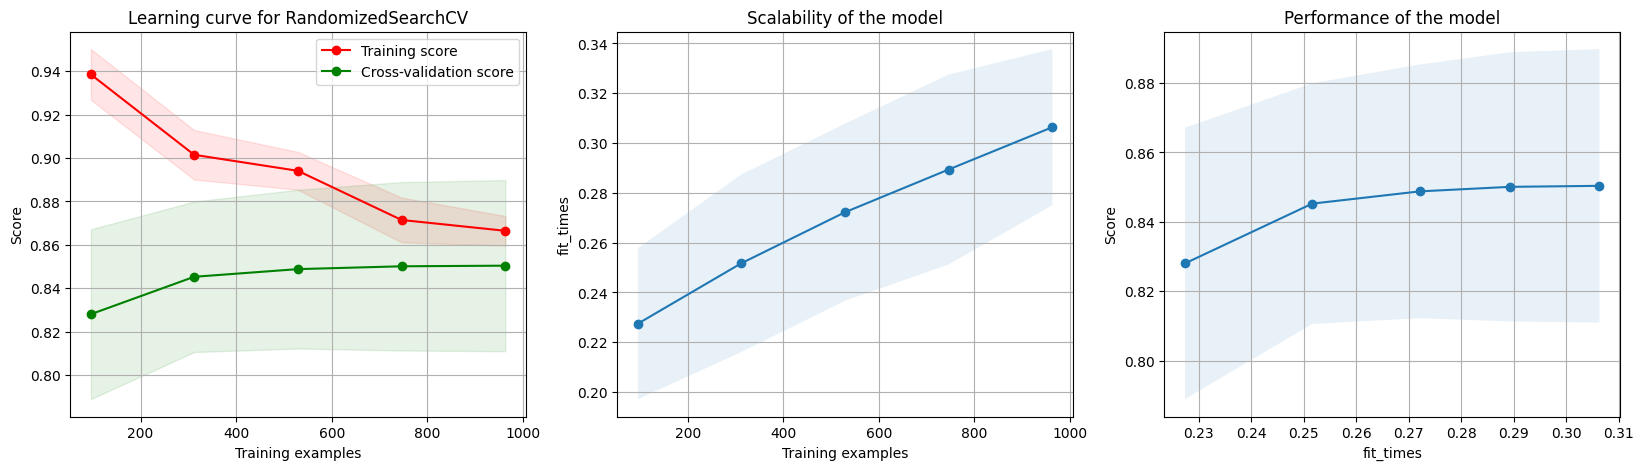

In [ ]:
plot_learning_curve(gbr, "Learning curve for RandomizedSearchCV", X_train, y_train)

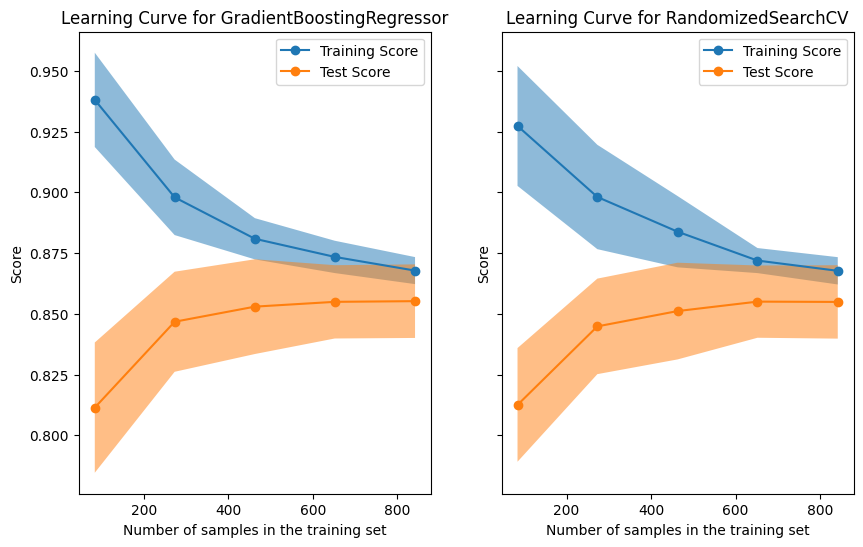

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=10, test_size=0.3, random_state=45),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between"
}

for ax_idx, estimator in enumerate([gbr, rscv]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")